# Đồ án thực hành PTDLUD

## Import library

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Read 2 file csv and merge them

In [2]:
# Load the CSV files into pandas DataFrames
df1 = pd.read_excel('Data_Train_p1.xlsx')
df2 = pd.read_excel('Data_Train_p2.xlsx')

# Concatenate the DataFrames vertically
df = pd.concat([df1, df2], ignore_index=True)

# # Save the concatenated DataFrame to a new CSV file
# df.to_excel('df.xlsx', index=False)

## 6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

### Create a boxplot to observe outliers in 'Price' column

c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


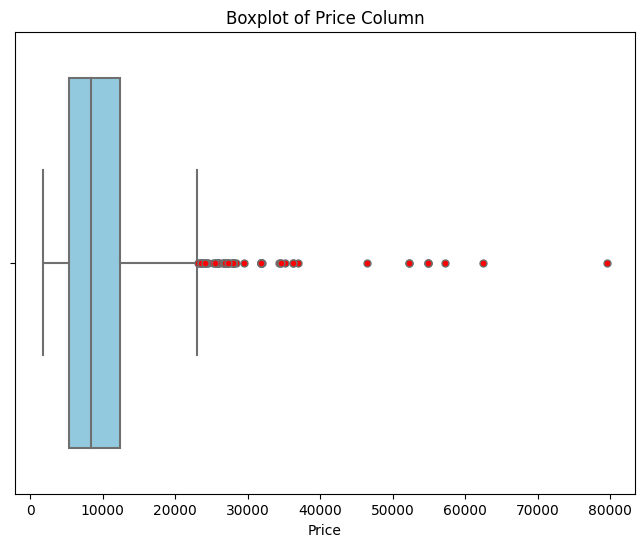

In [3]:
# Create a horizontal boxplot for the 'Price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'], orient='h', color='skyblue', flierprops=dict(markerfacecolor='red', marker='o'))

# Customize boxplot
plt.title('Boxplot of Price Column')
plt.xlabel('Price')

# Show boxplot
plt.show()

Ta thấy dữ liệu có khá nhiều outliers, do tập dữ liệu có nhiều yếu tố ảnh hưởng đến giá máy bay như hãng hàng không, đi xuất phát, điểm đến, độ dài chuyến bay,... Vì thế các outliers này là điều không thể tránh khỏi. Ta cùng khám phá các đặc điểm của các outliers này: 

### Detect outliers

In [4]:
# Calculate the interquartile range (IQR)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the identified outliers
print('The number of outliers: ', len(outliers))
print("Outliers:")
print(outliers)

The number of outliers:  94
Outliers:
                 Airline Date_of_Journey    Source Destination  \
123            Air India       1/03/2019     Delhi      Cochin   
396    Multiple carriers       1/03/2019     Delhi      Cochin   
627          Jet Airways      01/03/2019  Banglore   New Delhi   
688          Jet Airways      01/03/2019  Banglore   New Delhi   
750          Jet Airways      18/03/2019  Banglore   New Delhi   
...                  ...             ...       ...         ...   
10180        Jet Airways      01/03/2019  Banglore   New Delhi   
10313        Jet Airways      01/03/2019  Banglore   New Delhi   
10450          Air India      01/03/2019  Banglore   New Delhi   
10494        Jet Airways      01/03/2019  Banglore   New Delhi   
10503        Jet Airways      15/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396          DEL 

### Create df_no_outliers by remove outliers to compare

In [5]:
# Create df_no_outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [6]:
# Mean of df_no_outliers price
mean_no_outliers = df_no_outliers['Price'].mean()

# Mean of outliers price
mean_outliers = outliers['Price'].mean()

# Calculate the percentage difference
percentage_difference = ((mean_outliers - mean_no_outliers) / mean_no_outliers) * 100

# Print the percentage difference
print("Average price of outliers price: ", mean_outliers)

print("Average price of no outliers price: ", mean_no_outliers)

print(f"Percentage Difference: {percentage_difference:.2f}%")

Average price of outliers price:  30423.042553191488
Average price of no outliers price:  8898.165344664778
Percentage Difference: 241.90%


Qua việc tính giá trung bình của outliers ta thấy rằng những chuyến bay này có giá rất cao (cao hơn 241,90% so với những chuyến bay bình thường). Ta cùng tìm hiểu xem những chuyến bay này thường xuất phát ở đâu và hạ cánh ở đâu:

Percentage Distribution of Source in outliers:
Source
Banglore    76.60
Delhi       17.02
Mumbai       5.32
Kolkata      1.06
Name: count, dtype: float64


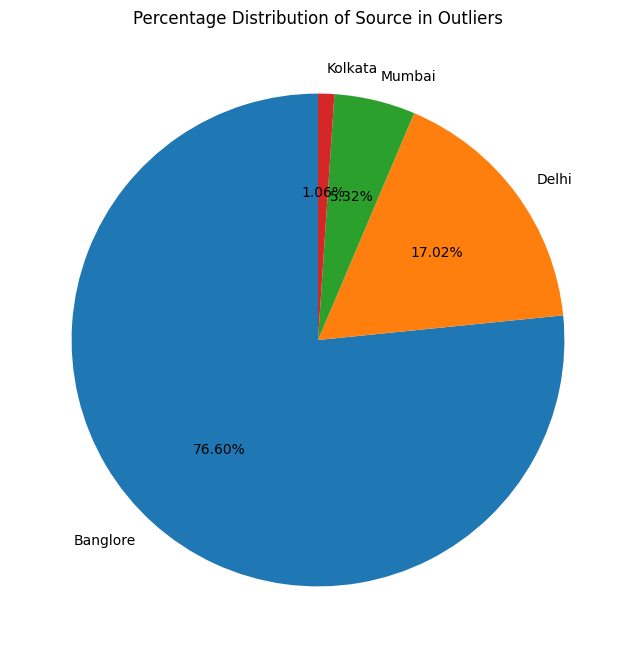

In [7]:
# Calculate the percentage each Source of outliers
percentage_distribution_outliers = (outliers['Source'].value_counts() / len(outliers)) * 100

# Calculate the percentage Source for df
percentage_distribution_df = (df['Source'].value_counts() / len(df)) * 100

# Display the percentage Source in outliers
print("Percentage Distribution of Source in outliers:")
print(percentage_distribution_outliers.round(2))

# Create a pie chart to perform it
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution_outliers, labels=percentage_distribution_outliers.index, autopct='%1.2f%%', startangle=90)

plt.title('Percentage Distribution of Source in Outliers')

plt.show()

Percentage Distribution of Destination in outliers:
Destination
New Delhi    76.60
Cochin       17.02
Hyderabad     5.32
Banglore      1.06
Name: count, dtype: float64


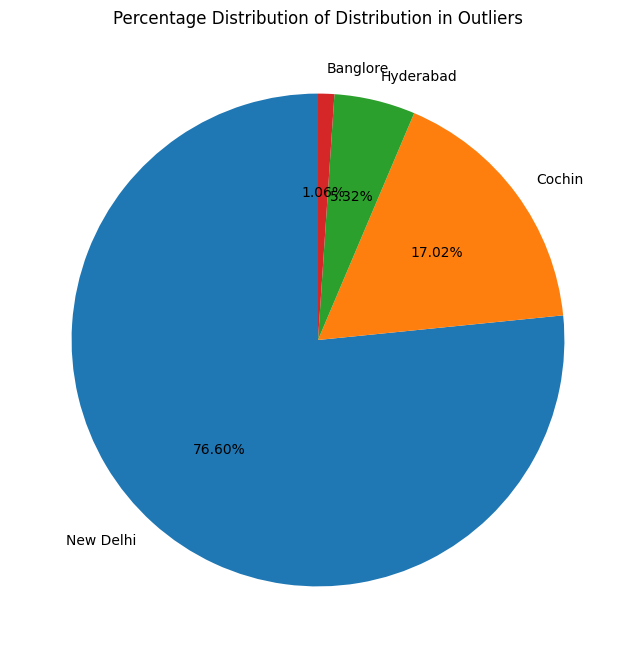

In [8]:
# Calculate the percentage each Destination of outliers
percentage_distribution_outliers = (outliers['Destination'].value_counts() / len(outliers)) * 100

# Calculate the percentage Destination for df
percentage_distribution_df = (df['Destination'].value_counts() / len(df)) * 100

# Display the percentage Destination in outliers
print("Percentage Distribution of Destination in outliers:")
print(percentage_distribution_outliers.round(2))

# Create a pie chart to perform it
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution_outliers, labels=percentage_distribution_outliers.index, autopct='%1.2f%%', startangle=90)

plt.title('Percentage Distribution of Distribution in Outliers')

plt.show()

Như vậy ta có thể thấy rằng, những chuyến bay có giá cao nhất sẽ là từ Banglore -> New Delhi, Delhi -> Cochin,...

Vậy những hãng máy bay nào thường sẽ có giá cao: 

Airline Counts in outliers:
Airline
Jet Airways             62
Air India               15
Multiple carriers       10
Jet Airways Business     6
SpiceJet                 1
Name: count, dtype: int64


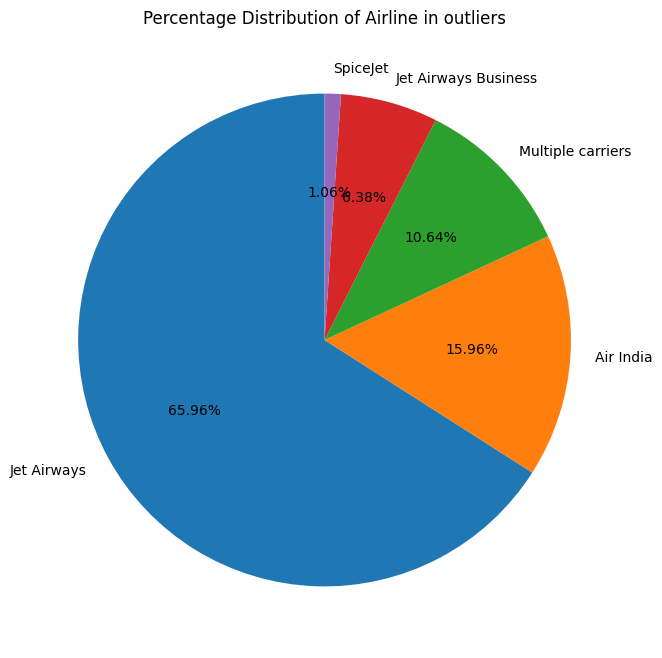

In [9]:
# Count the occurrences of each Airline in outliers
airline_counts_outliers = outliers['Airline'].value_counts()

# Display the counts
print("Airline Counts in outliers:")
print(airline_counts_outliers)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(airline_counts_outliers, labels=airline_counts_outliers.index, autopct='%1.2f%%', startangle=90)
plt.title('Percentage Distribution of Airline in outliers')
plt.show()

Thông qua pie chart trên, ta thấy rằng hãng hàng không Jet Airways chiếm phần lớn trong các outliers. Vì Jet Airways tập trung cung cấp các dịch vụ và tiện nghi cao cấp (nhưng đã ngưng hoạt động từ năm 2019).

## Visualize: 8. Giá vé có thay đổi theo thời gian đi và đến không?

### Create Day, Month, Day_of_Week column to analyse correlation of time and price

In [10]:
# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract date additional features
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Day_of_Week'] = df['Date_of_Journey'].dt.day_name()

In [11]:
# Calculate correlation between features and 'Price'
correlation_matrix = df[['Journey_Day', 'Journey_Month', 'Price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Journey_Day  Journey_Month     Price
Journey_Day       1.000000      -0.038541 -0.153589
Journey_Month    -0.038541       1.000000 -0.103787
Price            -0.153589      -0.103787  1.000000


- Journey_Day và Price là -0.15: giá vé theo ngày đang tỉ lệ nghịch và độ lớn 0.15 là thể hiện mức độ ảnh hưởng không quá lớn (Ngày càng tăng thì giá vé giảm nhẹ). Lí do có thể là do đầu tháng người dân họ có xu hướng đi du lịch và thực hiện các chuyến bay nhiều hơn.

- Journey_Month và Price là -0.10: giá vé theo tháng đang tỉ lệ nghịch và độ lớn 0.10 là thể hiện mức độ ảnh hưởng không quá lớn (Tháng càng tăng thì giá vé giảm nhẹ, trong data chỉ có tháng 3,4,5,6 của năm 2019). Giá vé của tháng 3 cao nhất là do đây là thời điểm sau Tết cũng như là khoảng thời gian diễn ra lễ hội Holi ở Ấn Độ, vì thế nhu cầu du lịch và đi lại cao hơn so với các tháng say này.

### Create scatterplot to visualize data

c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


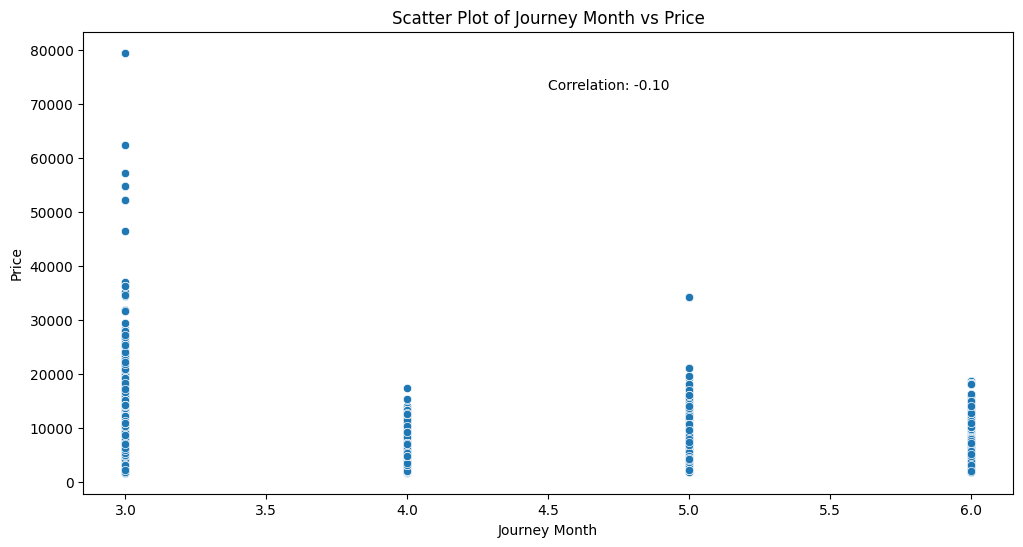

c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


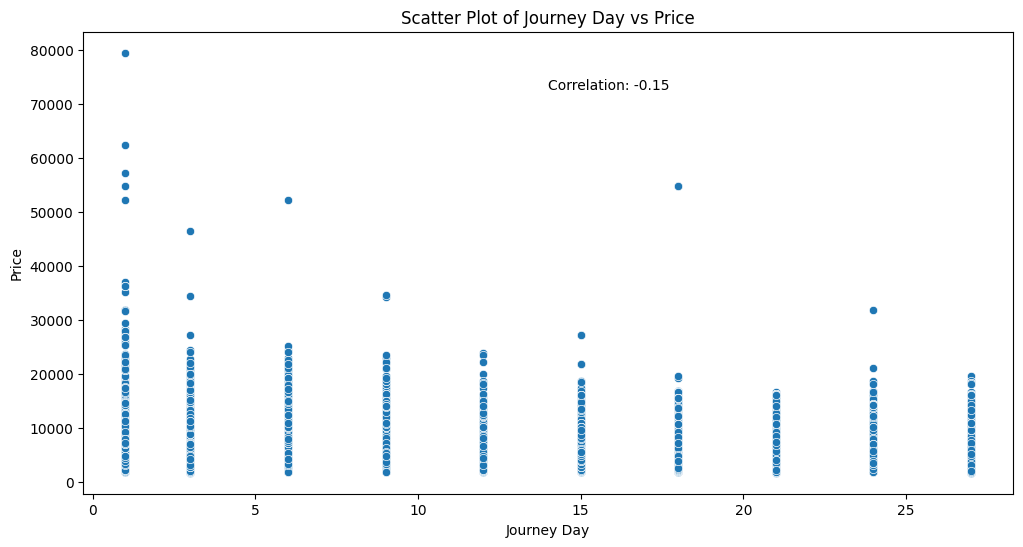

In [12]:
# Scatter plot for 'Journey_Month' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Journey_Month', y='Price', data=df)
plt.title('Scatter Plot of Journey Month vs Price')
plt.xlabel('Journey Month')
plt.ylabel('Price')

# Display the correlation coefficient
correlation_month_price = df['Journey_Month'].corr(df['Price'])
plt.text(0.5, 0.9, f'Correlation: {correlation_month_price:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

# Scatter plot for 'Journey_Day' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Journey_Day', y='Price', data=df)
plt.title('Scatter Plot of Journey Day vs Price')
plt.xlabel('Journey Day')
plt.ylabel('Price')

# Display the correlation coefficient
correlation_day_price = df['Journey_Day'].corr(df['Price'])
plt.text(0.5, 0.9, f'Correlation: {correlation_day_price:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

Thông qua 2 scatterplot ở trên, ta thấy sự ảnh hưởng của thời gian lên giá vé là hoàn toàn đúng với những gì ta phân tích phía trên.

Các thứ trong tuần ảnh hưởng như thế nào đến giá vé? Vẽ boxplot của mỗi thứ trong tuần để xem chúng khác nhau như thế nào

c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


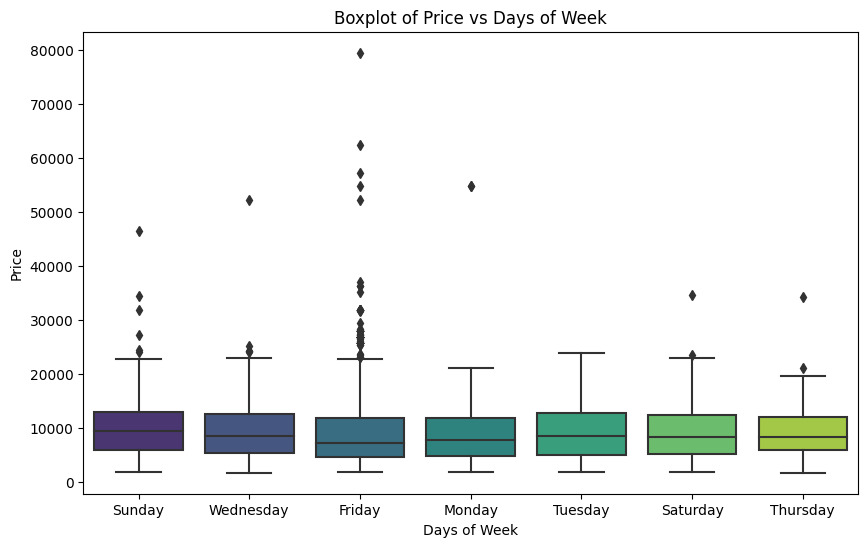

In [13]:
# Boxplot for 'Price' vs. 'Days_of_Week'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Day_of_Week'], y=df['Price'], data=df, palette='viridis')

plt.title('Boxplot of Price vs Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Price')

plt.show()

- Ta thấy rằng giá vé của chủ nhật là cao nhất.

- Thứ 6 có nhiều outliers nhất do nhu cầu đi lại, du lịch cho cuối tuần sẽ tăng (thứ 6 bay đi thành phố nào đó để du lịch) dẫn đến việc giá vé có thể tăng 1 cách đột ngột.

## Visualize: 9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?

### Get distinct journey (Source -> Destination) and calculate the number of flights and the mean of price of each journey

In [14]:
# Group by 'Source' and 'Destination' and calculate the mean price
mean_price_per_combination = df.groupby(['Source', 'Destination'])['Price'].mean().reset_index()

# Sort the DataFrame by mean prices in descending order and ignore the index
mean_price_per_combination = mean_price_per_combination.sort_values(by='Price', ascending=False, ignore_index=True)

# Group by 'Source' and 'Destination' and count the number of flights
count_per_combination = df.groupby(['Source', 'Destination']).size().reset_index(name='Number of flights')

# Merge the DataFrames based on 'Source' and 'Destination'
mean_price_per_combination = pd.merge(mean_price_per_combination, count_per_combination, on=['Source', 'Destination'])

# Display the distinct source-destination pairs and their corresponding mean prices
print("Distinct Source -> Destination with mean price and the number of flights:")
mean_price_per_combination

Distinct Source -> Destination with mean price and the number of flights:


,Source,Destination,Price,Number of flights
0,Banglore,New Delhi,11917.716738,932
1,Delhi,Cochin,10539.439057,4537
2,Kolkata,Banglore,9160.155641,2872
3,Banglore,Delhi,5143.918577,1265
4,Mumbai,Hyderabad,5059.708752,697
5,Chennai,Kolkata,4789.892388,381


Dựa vào bảng trên, ta thấy rằng có sự khác nhau rõ rệt giữa điểm xuất phát và điểm đến.

- Chuyến bay từ Banglore -> New Delhi, Delhi -> Cochin (4537 chuyến bay) và Kolkata -> Banglore (2872 chuyến bay) là 3 chuyến bay có giá cao nhất. Vì đây đều là các thành phố lớn và quan trọng với Ấn Độ do đó luôn có nhu cầu đi lại rất lớn.
    - Delhi: Delhi, thủ đô của Ấn Độ, có một dân số lớn với khoảng 16-17 triệu người.
    - Bangalore: Bangalore, một trung tâm công nghệ và IT, cũng có một dân số lớn, ước khoảng 13-14 triệu người.
    - Cochin: Cochin có một trong những cảng tự nhiên lớn nhất thế giới, nơi có hoạt động vận tải hàng hải quan trọng.

- Chuyến bay từ Mumbai -> Hyderabad và Chennai -> Kolkata là 2 chuyến bay có giá thấp nhất cũng như ít chuyến bay nhất.

### Explore the % contribute of each journey to total price

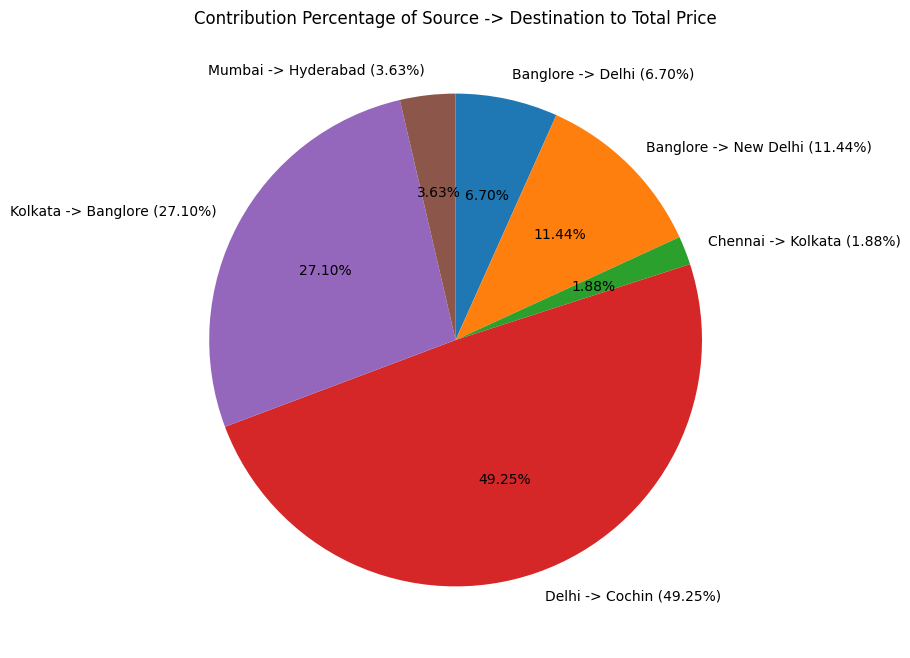

In [15]:
# Calculate total price for the entire dataset
total_price = df['Price'].sum()

# Group by 'Source' and 'Destination' and calculate the mean price and count
mean_price_per_combination = df.groupby(['Source', 'Destination'])['Price'].agg(['mean', 'count']).reset_index()
mean_price_per_combination.columns = ['Source', 'Destination', 'Mean_Price', 'Count']

# Calculate the contribution percentage for each Source -> Destination pair
mean_price_per_combination['Contribution_Percentage'] = (mean_price_per_combination['Mean_Price'] * mean_price_per_combination['Count'] / total_price) * 100

# Create labels for the pie chart
labels = mean_price_per_combination.apply(lambda row: f"{row['Source']} -> {row['Destination']} ({row['Contribution_Percentage']:.2f}%)", axis=1)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(mean_price_per_combination['Contribution_Percentage'], labels=labels, autopct='%1.2f%%', startangle=90, counterclock=False)
plt.title('Contribution Percentage of Source -> Destination to Total Price')
plt.show()

Dựa vào pie chart trên ta thấy rằng 2 chuyến bay nội địa quan trọng nhất tại Ấn Độ là Delhi -> Cochin và Kolkata -> Banglore. Các hãng hàng không Ấn Độ nên tập trung khai thác 2 chuyến bay này và nâng cao chất lượng phục vụ của chuyến bay.

# Dự đoán giá vé
 

## Check missing value and remove it

In [16]:
# Check missing value
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Day_of_Week        0
dtype: int64

In [17]:
# Remove it
df.dropna(inplace=True)

# Check it again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Day_of_Week        0
dtype: int64

## Data Preprocessing: Convert categorical variables into numerical representations

### Extract Hour and Minute in Dep_Time

In [18]:
# Extract hour
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Extract minute
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

C:\Users\thanh.lam\AppData\Local\Temp\ipykernel_20640\736396116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\thanh.lam\AppData\Local\Temp\ipykernel_20640\736396116.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute


### Extract Hour and Minute in Arrival_Time

In [19]:
# Extract hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extract minute
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\thanh.lam\AppData\Local\Temp\ipykernel_20640\4090026846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\thanh.lam\AppData\Local\Temp\ipykernel_20640\4090026846.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


### Drop Dep_Time, Date_of_Journey and Arrival_Time

In [20]:
df.drop(columns=['Arrival_Time', 'Dep_Time', 'Date_of_Journey'], inplace=True)

### Create Duration_Hour and Duration_Minute column by split Duration column

In [21]:
# Get duration column
duration = list(df['Duration'])

# Format duration string
for i in range(len(duration)):
    # Check duration just have hour or minute
    if len(duration[i].split()) != 2:
        # Just have hour -> add ' 0m' behide
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        # Just have minute -> add '0h ' before
        else:
            duration[i] = '0h ' + duration[i]

duration

# Init duration_hour and duration_minute
duration_hour = []
duration_minute = []


for i in range(len(duration)):
    # Split string at 'h' to extract hour
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    # Split string at 'm' to extract minute
    duration_minute.append(int(duration[i].split('m')[0].split()[-1]))

df['Duration_Hour'] = duration_hour
df['Duration_Minute'] = duration_minute

In [22]:
# Drop column Duration
df.drop(columns='Duration', inplace=True)

### Convert Airline to one-hot encoding (0, 1)

In [23]:
# Get Airline column
Airline = df[['Airline']]

# Use get_dummies function to tranform Airline from string to one-hot encoding
Airline = pd.get_dummies(Airline).astype(int)

Airline.head(5)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


### Convert Source to one-hot encoding (0, 1)

In [24]:
# Get Source column
Source = df[['Source']]

# Use get_dummies function to tranform Source from string to one-hot encoding
Source = pd.get_dummies(Source).astype(int)

Source.head(5)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


### Convert Destination to one-hot encoding (0, 1)

In [25]:
# Get Destination column
Destination = df[['Destination']]

# Use get_dummies function to tranform Destination from string to one-hot encoding
Destination = pd.get_dummies(Destination).astype(int)

Destination.head(5)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


### Drop no use columns

In [26]:
df.drop(columns=['Route', 'Additional_Info'], axis = 1,inplace=True)

### Tranform Total_Stops to int

In [27]:
# Replace string value to int value by using replace function
df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

### Concat Airline, Source, Destination (after one-hot encoding) to df

In [28]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [29]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Day_of_Week,Dep_Hour,Dep_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Air India,Delhi,Cochin,2,10913,27,3,Wednesday,7,0,...,0,1,0,0,0,1,0,0,0,0
10680,IndiGo,Chennai,Kolkata,0,5277,27,6,Thursday,22,5,...,1,0,0,0,0,0,0,0,1,0
10681,Multiple carriers,Delhi,Cochin,1,7485,21,5,Tuesday,10,20,...,0,1,0,0,0,1,0,0,0,0
10682,Jet Airways,Kolkata,Banglore,1,14231,24,3,Sunday,16,55,...,0,0,1,0,1,0,0,0,0,0


In [30]:
# Drop some unnecessary columns
df.drop(columns=['Airline', 'Source', 'Destination', 'Day_of_Week'], inplace=True)

### Final dataset for predict

In [31]:
df.head(5)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Feature selection

In [32]:
# Independent variable
X = df.drop(columns='Price', axis = 1)

# Dependent variable
Y = df['Price']

In [33]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

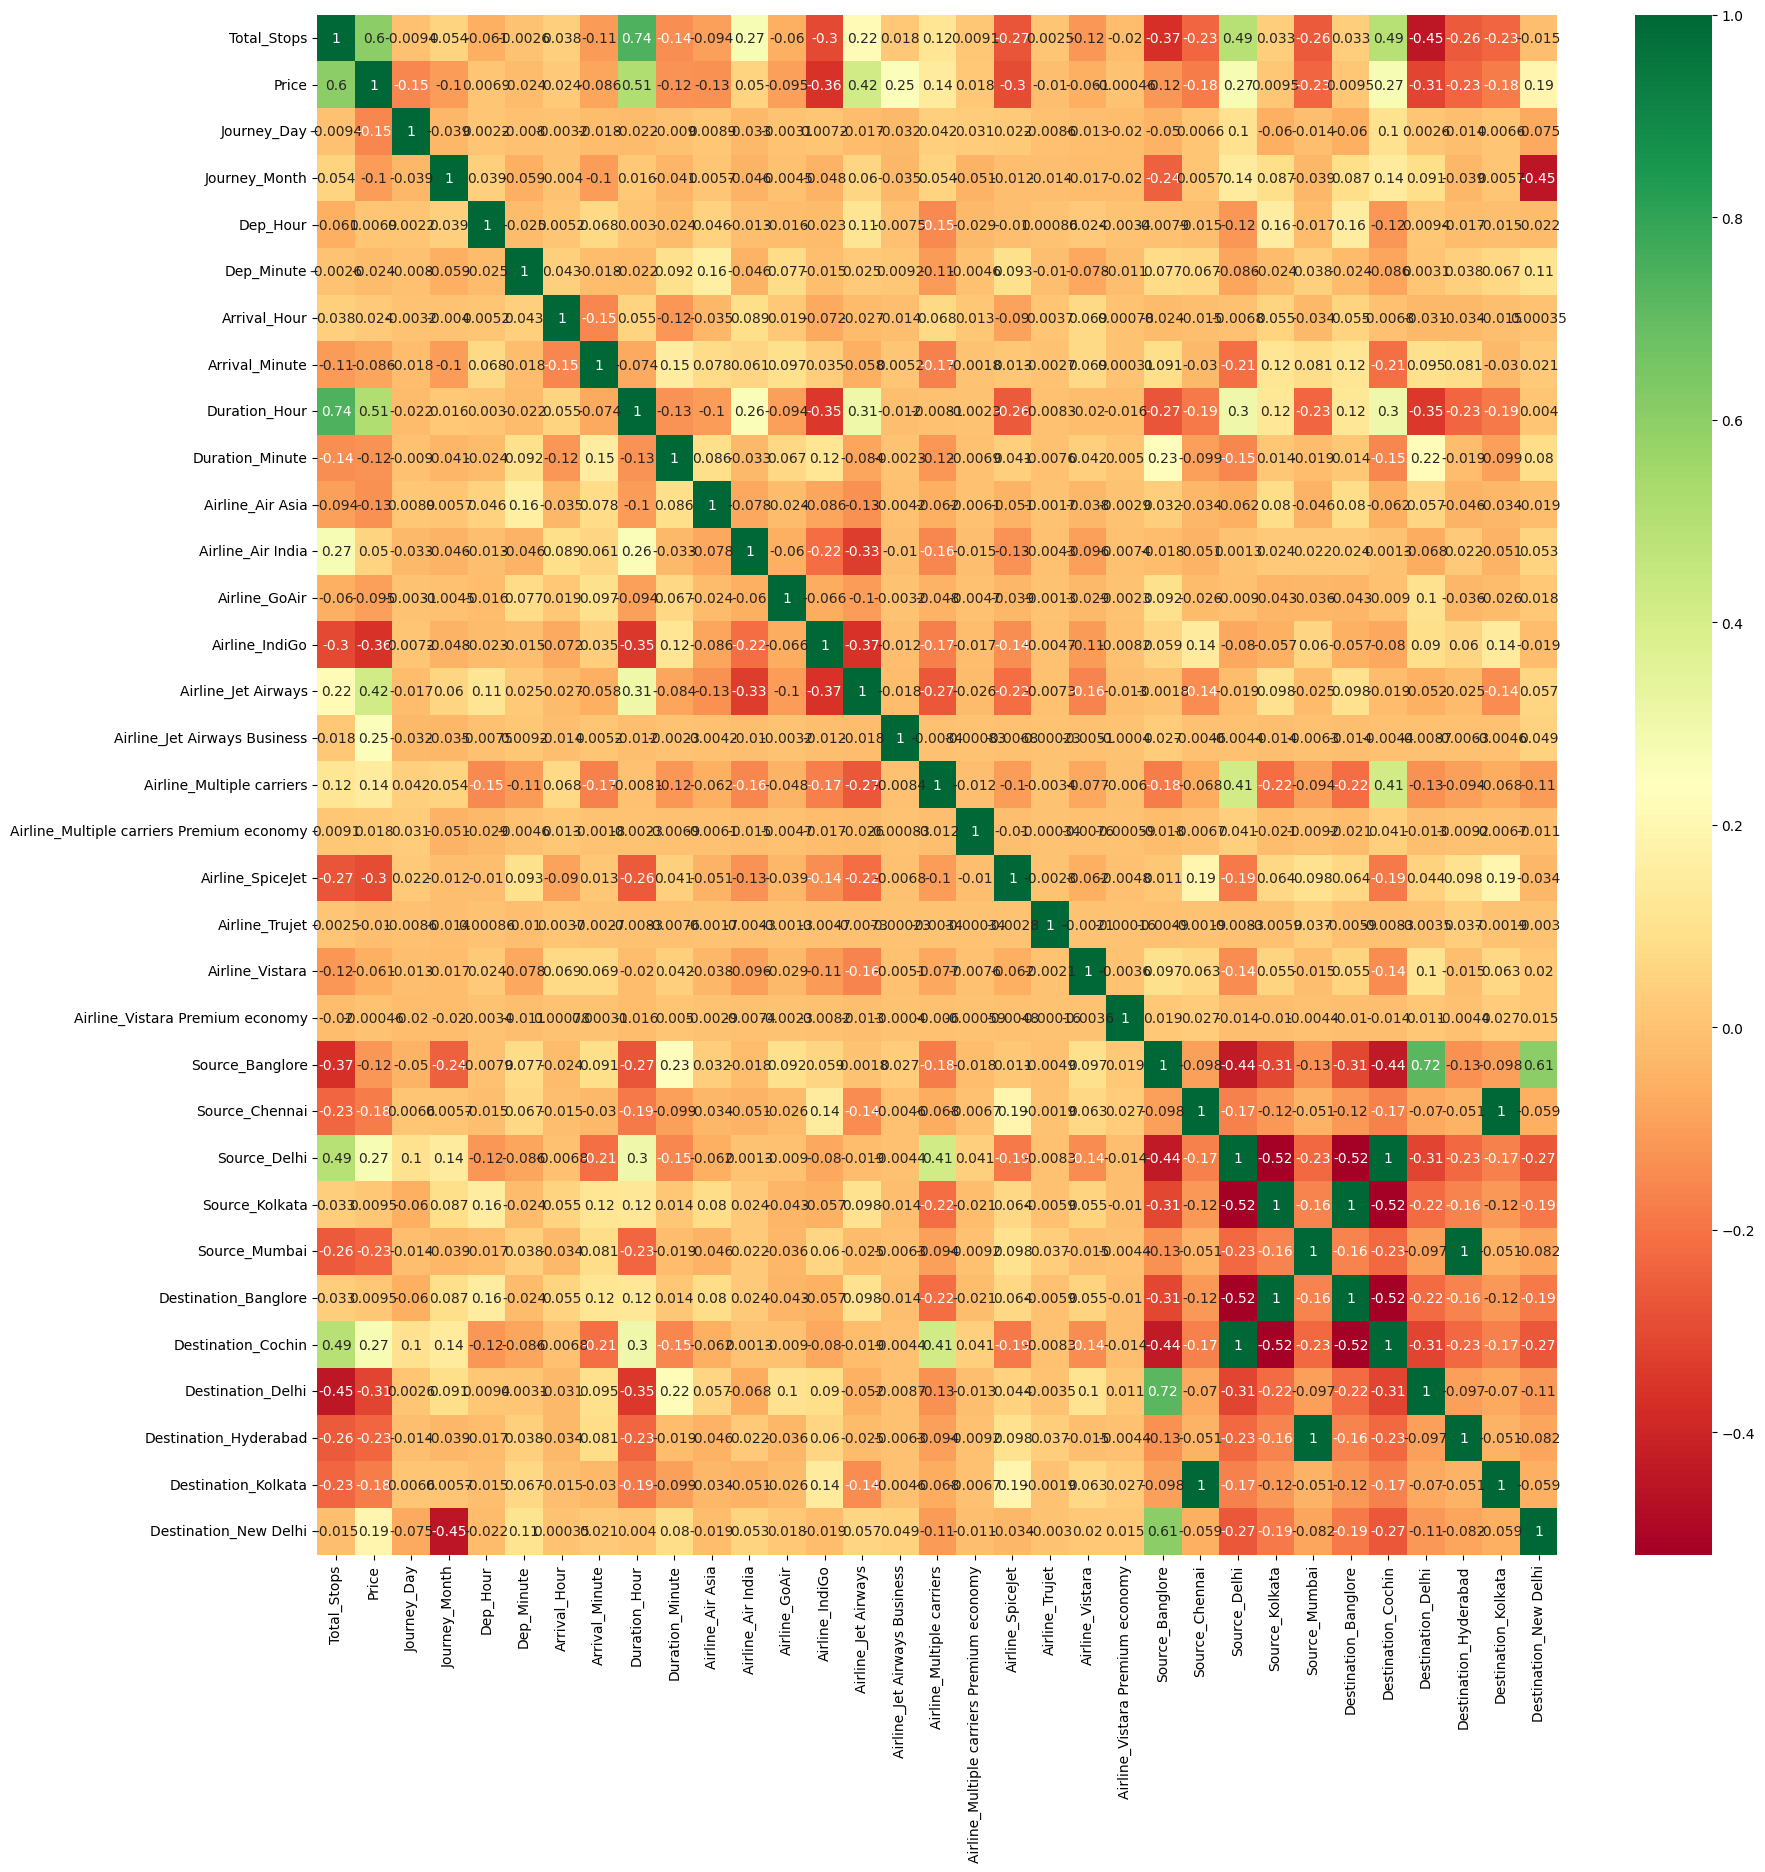

In [35]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn')

plt.show()

Các thuộc tính nào càng gần +-1 so với thuộc tính Price cho thấy mức độ ảnh hưởng của nó lên giá vé máy bay càng lớn.
- số dương --> đồng biến

- số âm --> nghịch biến

## Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

# Use train_test_split function to split data into train(80%) and test(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)

## Model Selection and Training

In [37]:
# Fit model using Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

## Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = rfr_model.predict(X_test)

In [39]:
# Calculate R-squared of training set: measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
rfr_model.score(X_train,Y_train)

0.9531155694994422

In [40]:
# Calculate R-squared of testing set: measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
rfr_model.score(X_test,Y_test)

0.8117503212394537

Điểm càng gần 1 càng tốt --> model đạt điểm tốt

c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thanh.lam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

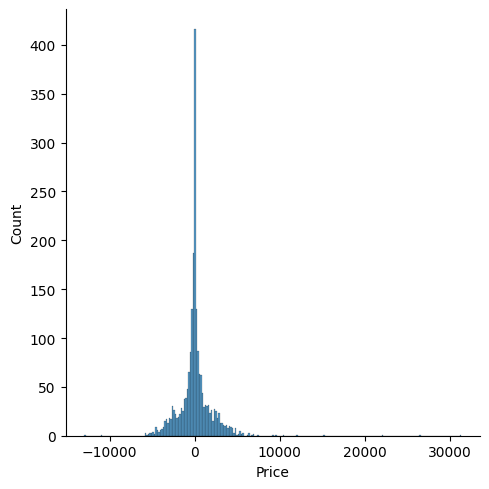

In [41]:
# Show differences between the actual target values (Y_test) and the predicted values (y_pred)
plt.figure(figsize=(8,8))
sns.displot(Y_test - y_pred)
plt.show()

Biểu đồ này thể hiện nếu có càng nhiều giá trị gần 0 hoặc = 0 thì càng tốt. --> Model đang làm khá tốt việc predict

### Calculate some metrics

In [42]:
from sklearn import metrics

# MAE gives a measure of the average absolute error between the predicted and actual values
print('MAE: ', metrics.mean_absolute_error(Y_test, y_pred))

# MSE the average of the squared differences between the actual values and the predicted values.
print('MSE: ', metrics.mean_squared_error(Y_test, y_pred))

# The Root Mean Squared Error is the square root of the MSE.
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

# The R-squared score ranges from 0 to 1, where 1 indicates a perfect fit, and 0 indicates that the model does not explain any of the variability 
# in the target variable.
print('R2_score: ', metrics.r2_score(Y_test, y_pred))

MAE:  1203.7315809573101
MSE:  4464620.657195735
RMSE:  2112.964897293785
R2_score:  0.8117503212394537


Các metrics dùng để đánh giá model
- Dựa vào R2_score = 0.81 --> Model dự đoán khá tốt.

Như chúng ta có thể thấy: Sau khi áp dụng phương án trên, R2_score của model đã tăng lên, chứng tỏ phương pháp

## Save model into pickle file

Mục đích là ta sẽ không cần train lại model khi mở lại file mà chỉ cần đọc file pickle để lấy ra model mình đã train

In [45]:
import pickle

# Write data into pickle file
file = open('Flight_Fare_Prediction.pickle', 'wb')
pickle.dump(rfr_model, file)

In [46]:
# Load model from pickle file to mod
model = open('Flight_Fare_Prediction.pickle', 'rb')
mod = pickle.load(model)

In [47]:
predict_data = mod.predict(X_test)

In [48]:
metrics.r2_score(Y_test, predict_data)

0.8117503212394537